In [1]:
mu = 0
std = 1
rv = sp.stats.norm(mu, std)

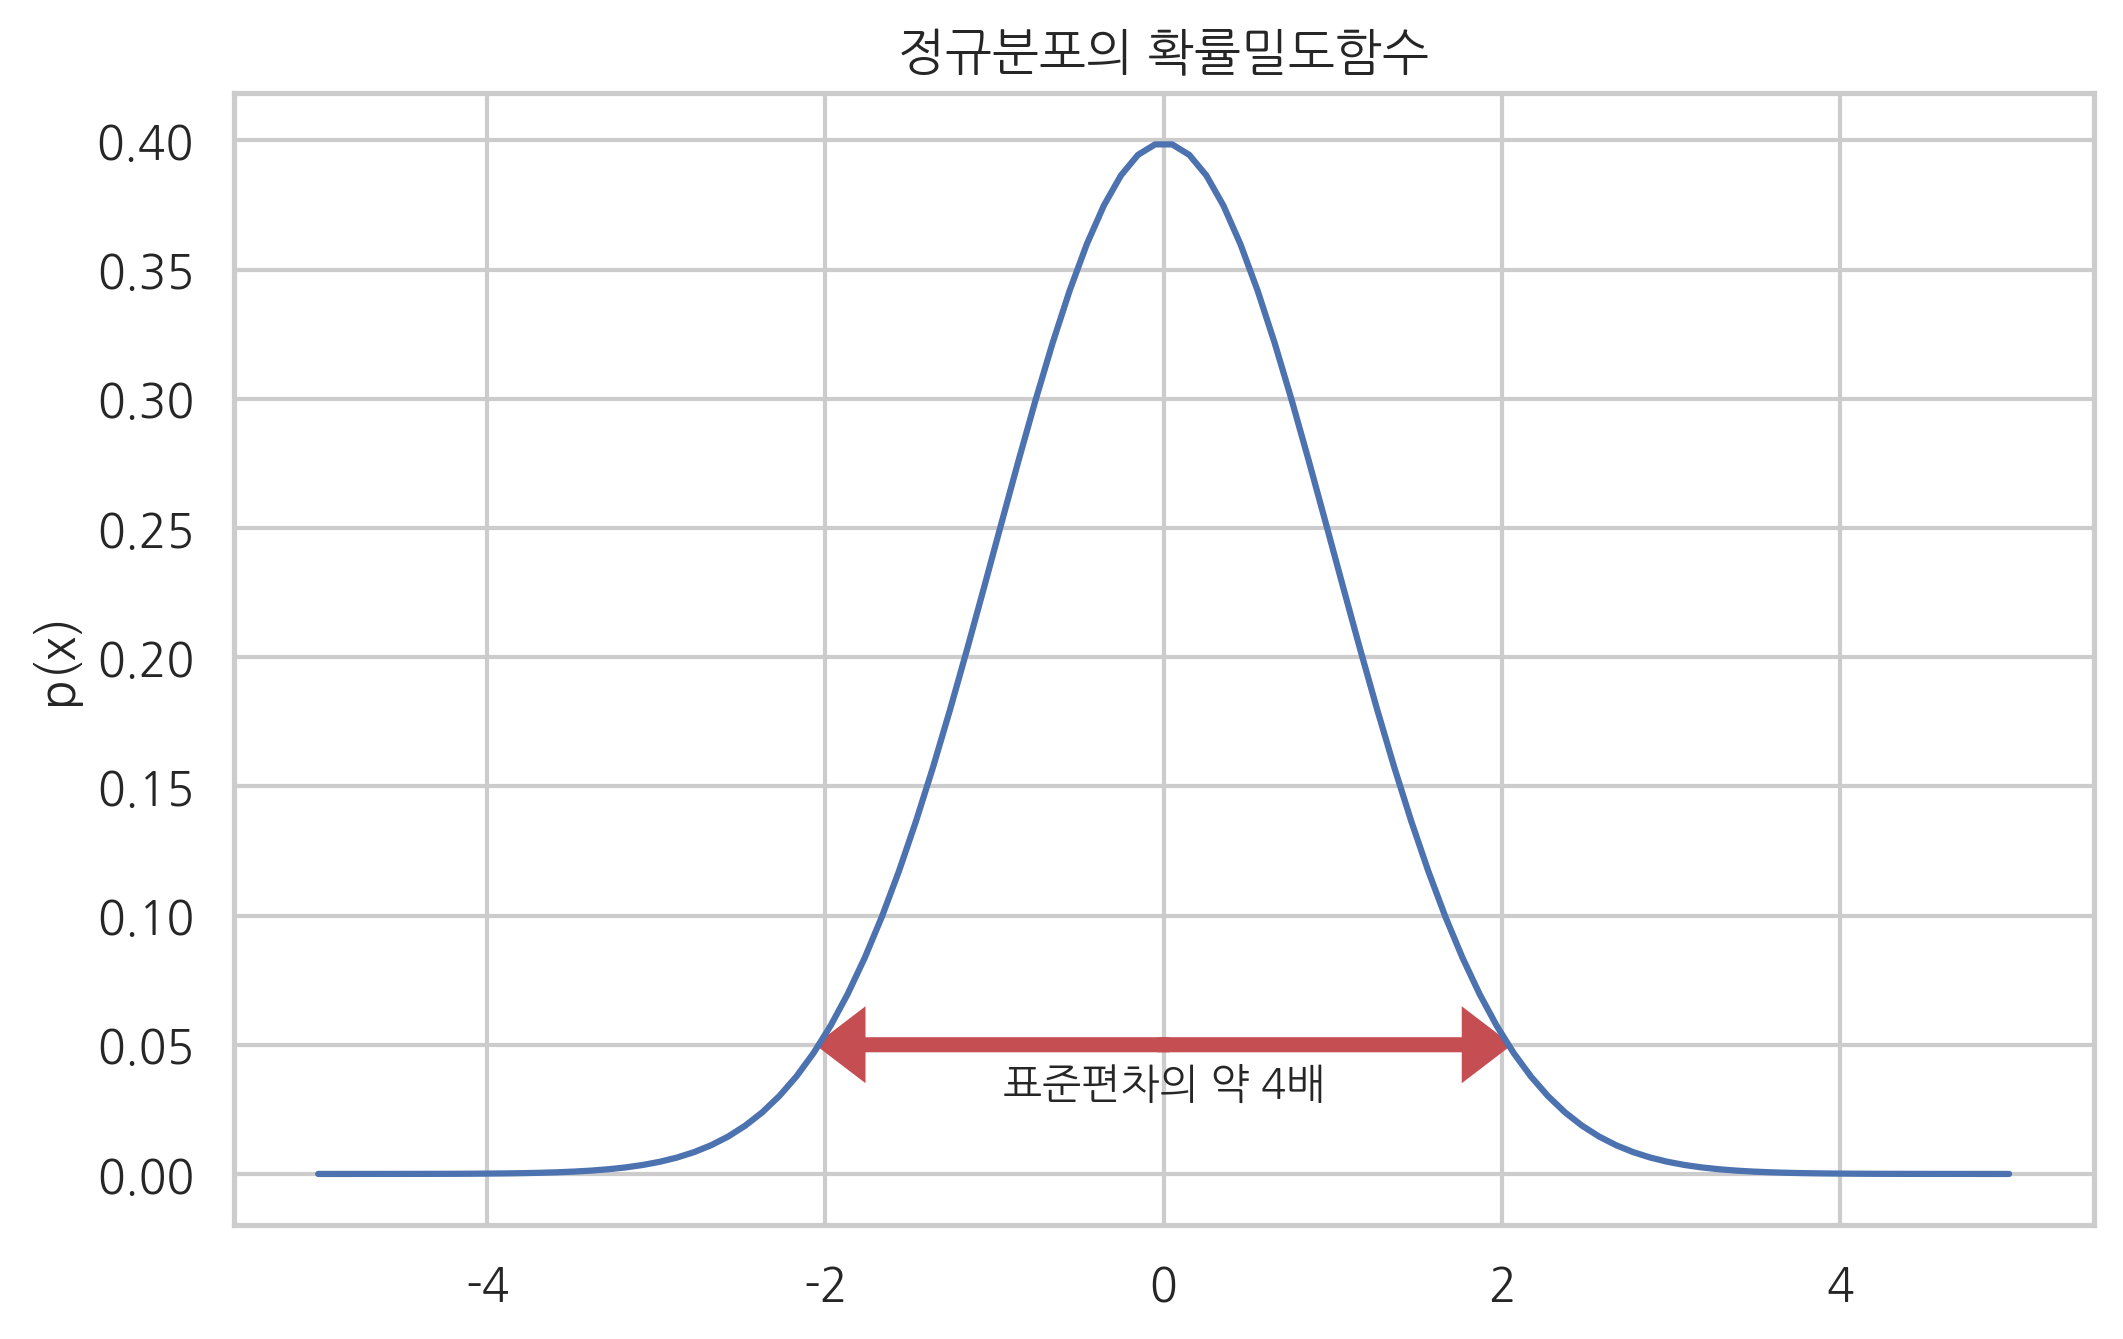

In [2]:
xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx))
plt.arrow(0, 0.05, 2, 0, lw=3, color='r', 
          head_width=0.02, head_length=0.2, length_includes_head=True)
plt.arrow(0, 0.05, -2, 0, lw=3, color='r', 
          head_width=0.02, head_length=0.2, length_includes_head=True)
plt.text(-0.95, 0.03, "표준편차의 약 4배")
plt.ylabel("p(x)")
plt.title("정규분포의 확률밀도함수")
plt.show()

In [3]:
np.random.seed(0)
x = rv.rvs(20)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574])

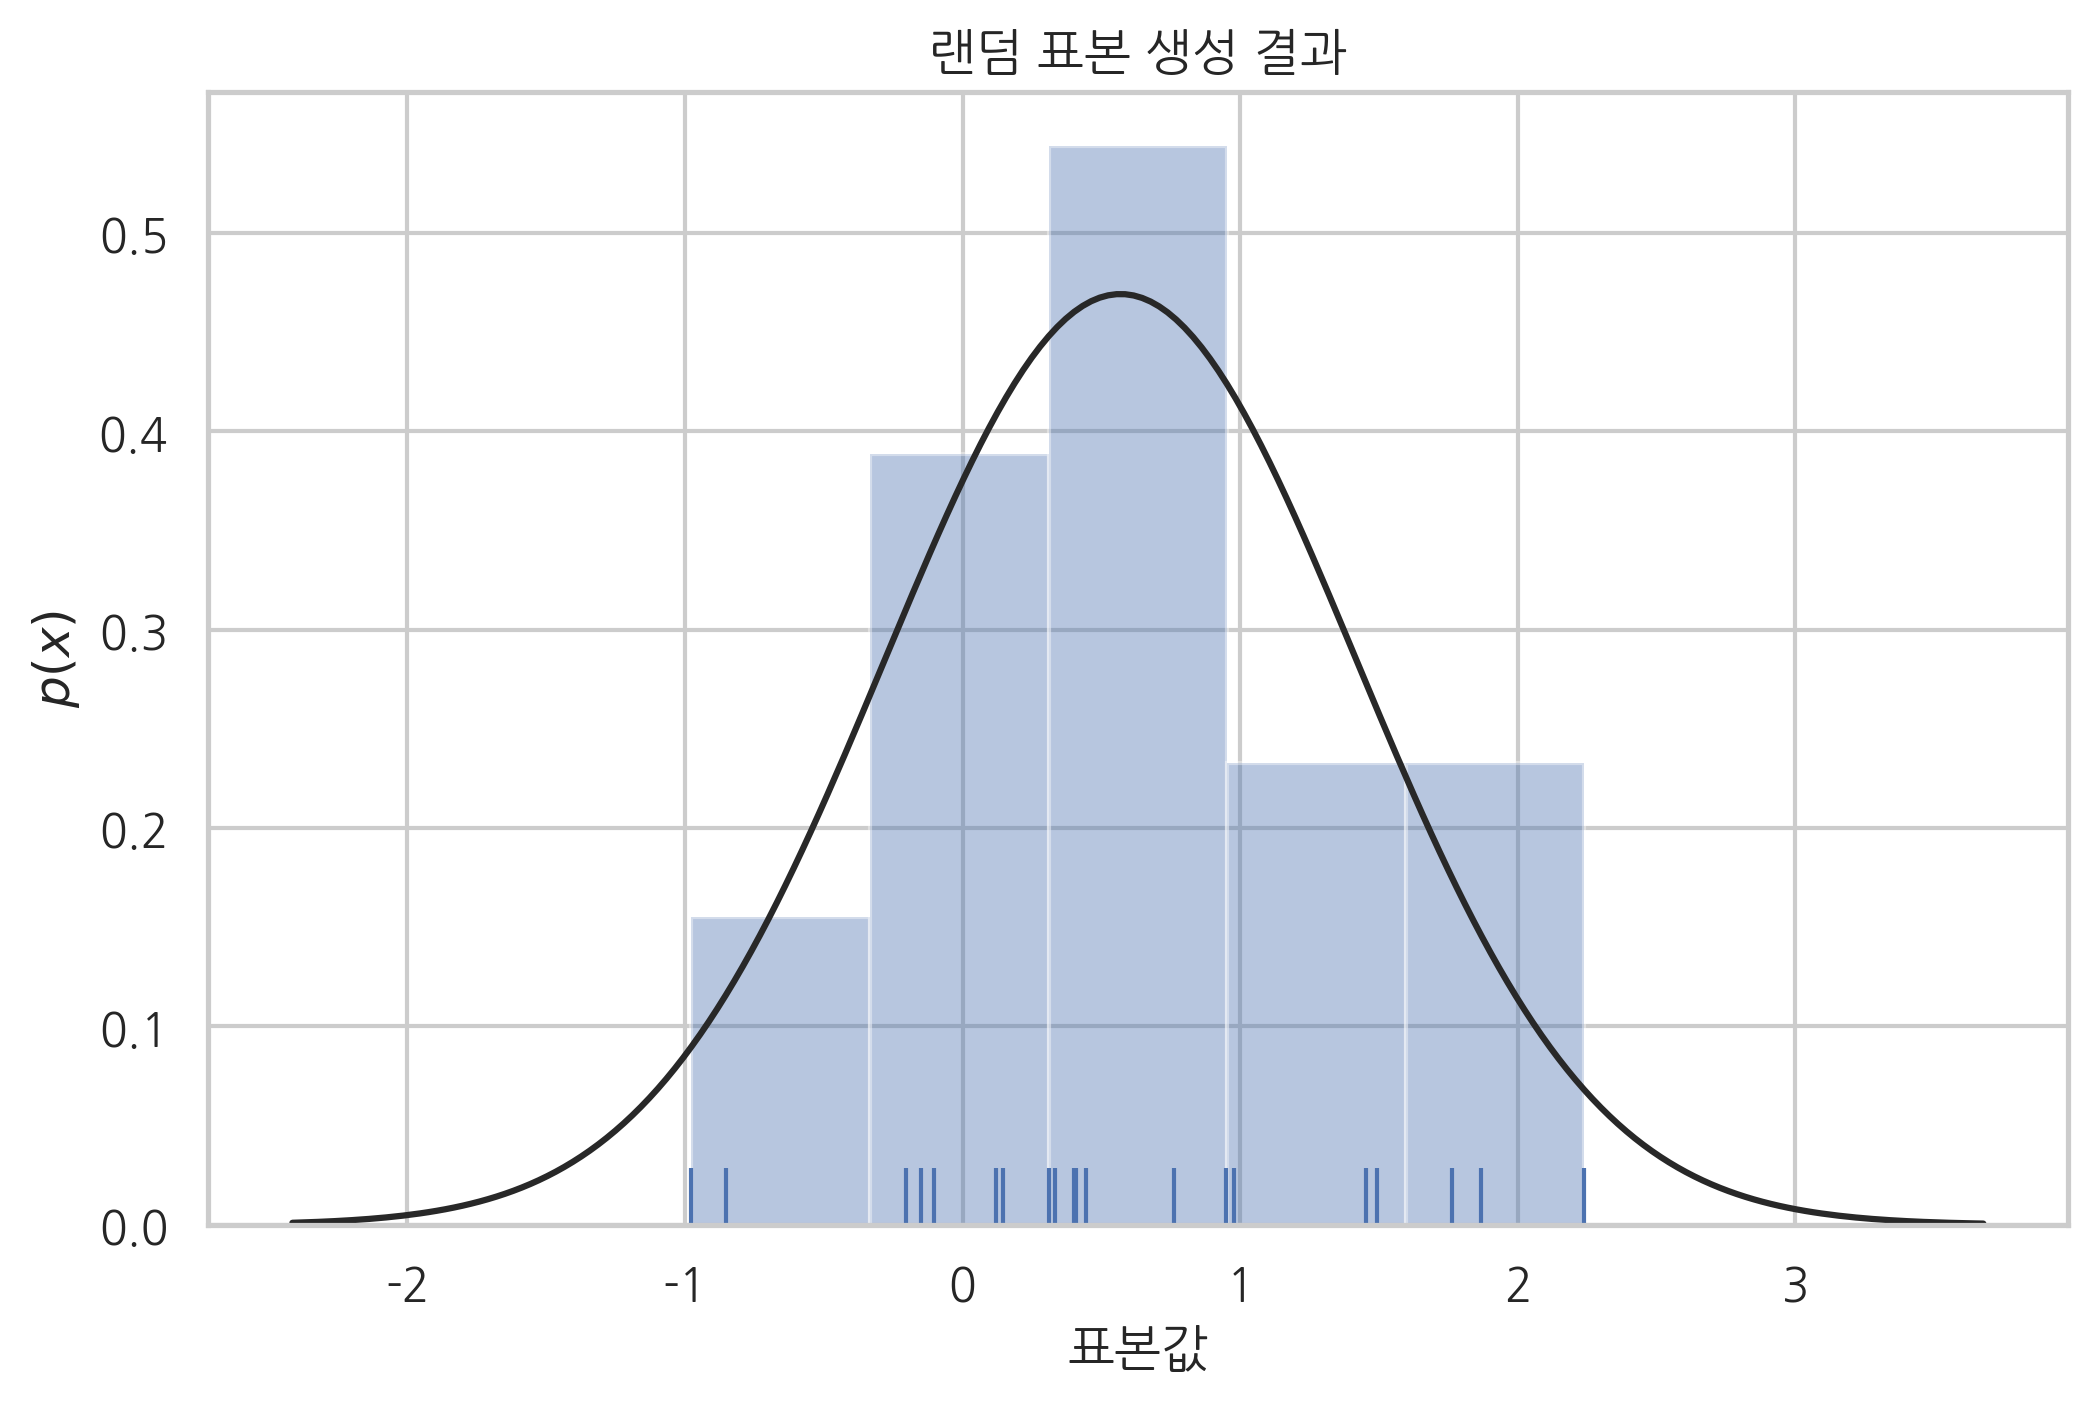

In [4]:
sns.distplot(x, rug=True, kde=False, fit=sp.stats.norm)
plt.title("랜덤 표본 생성 결과")
plt.xlabel("표본값")
plt.ylabel("$p(x)$")
plt.show()

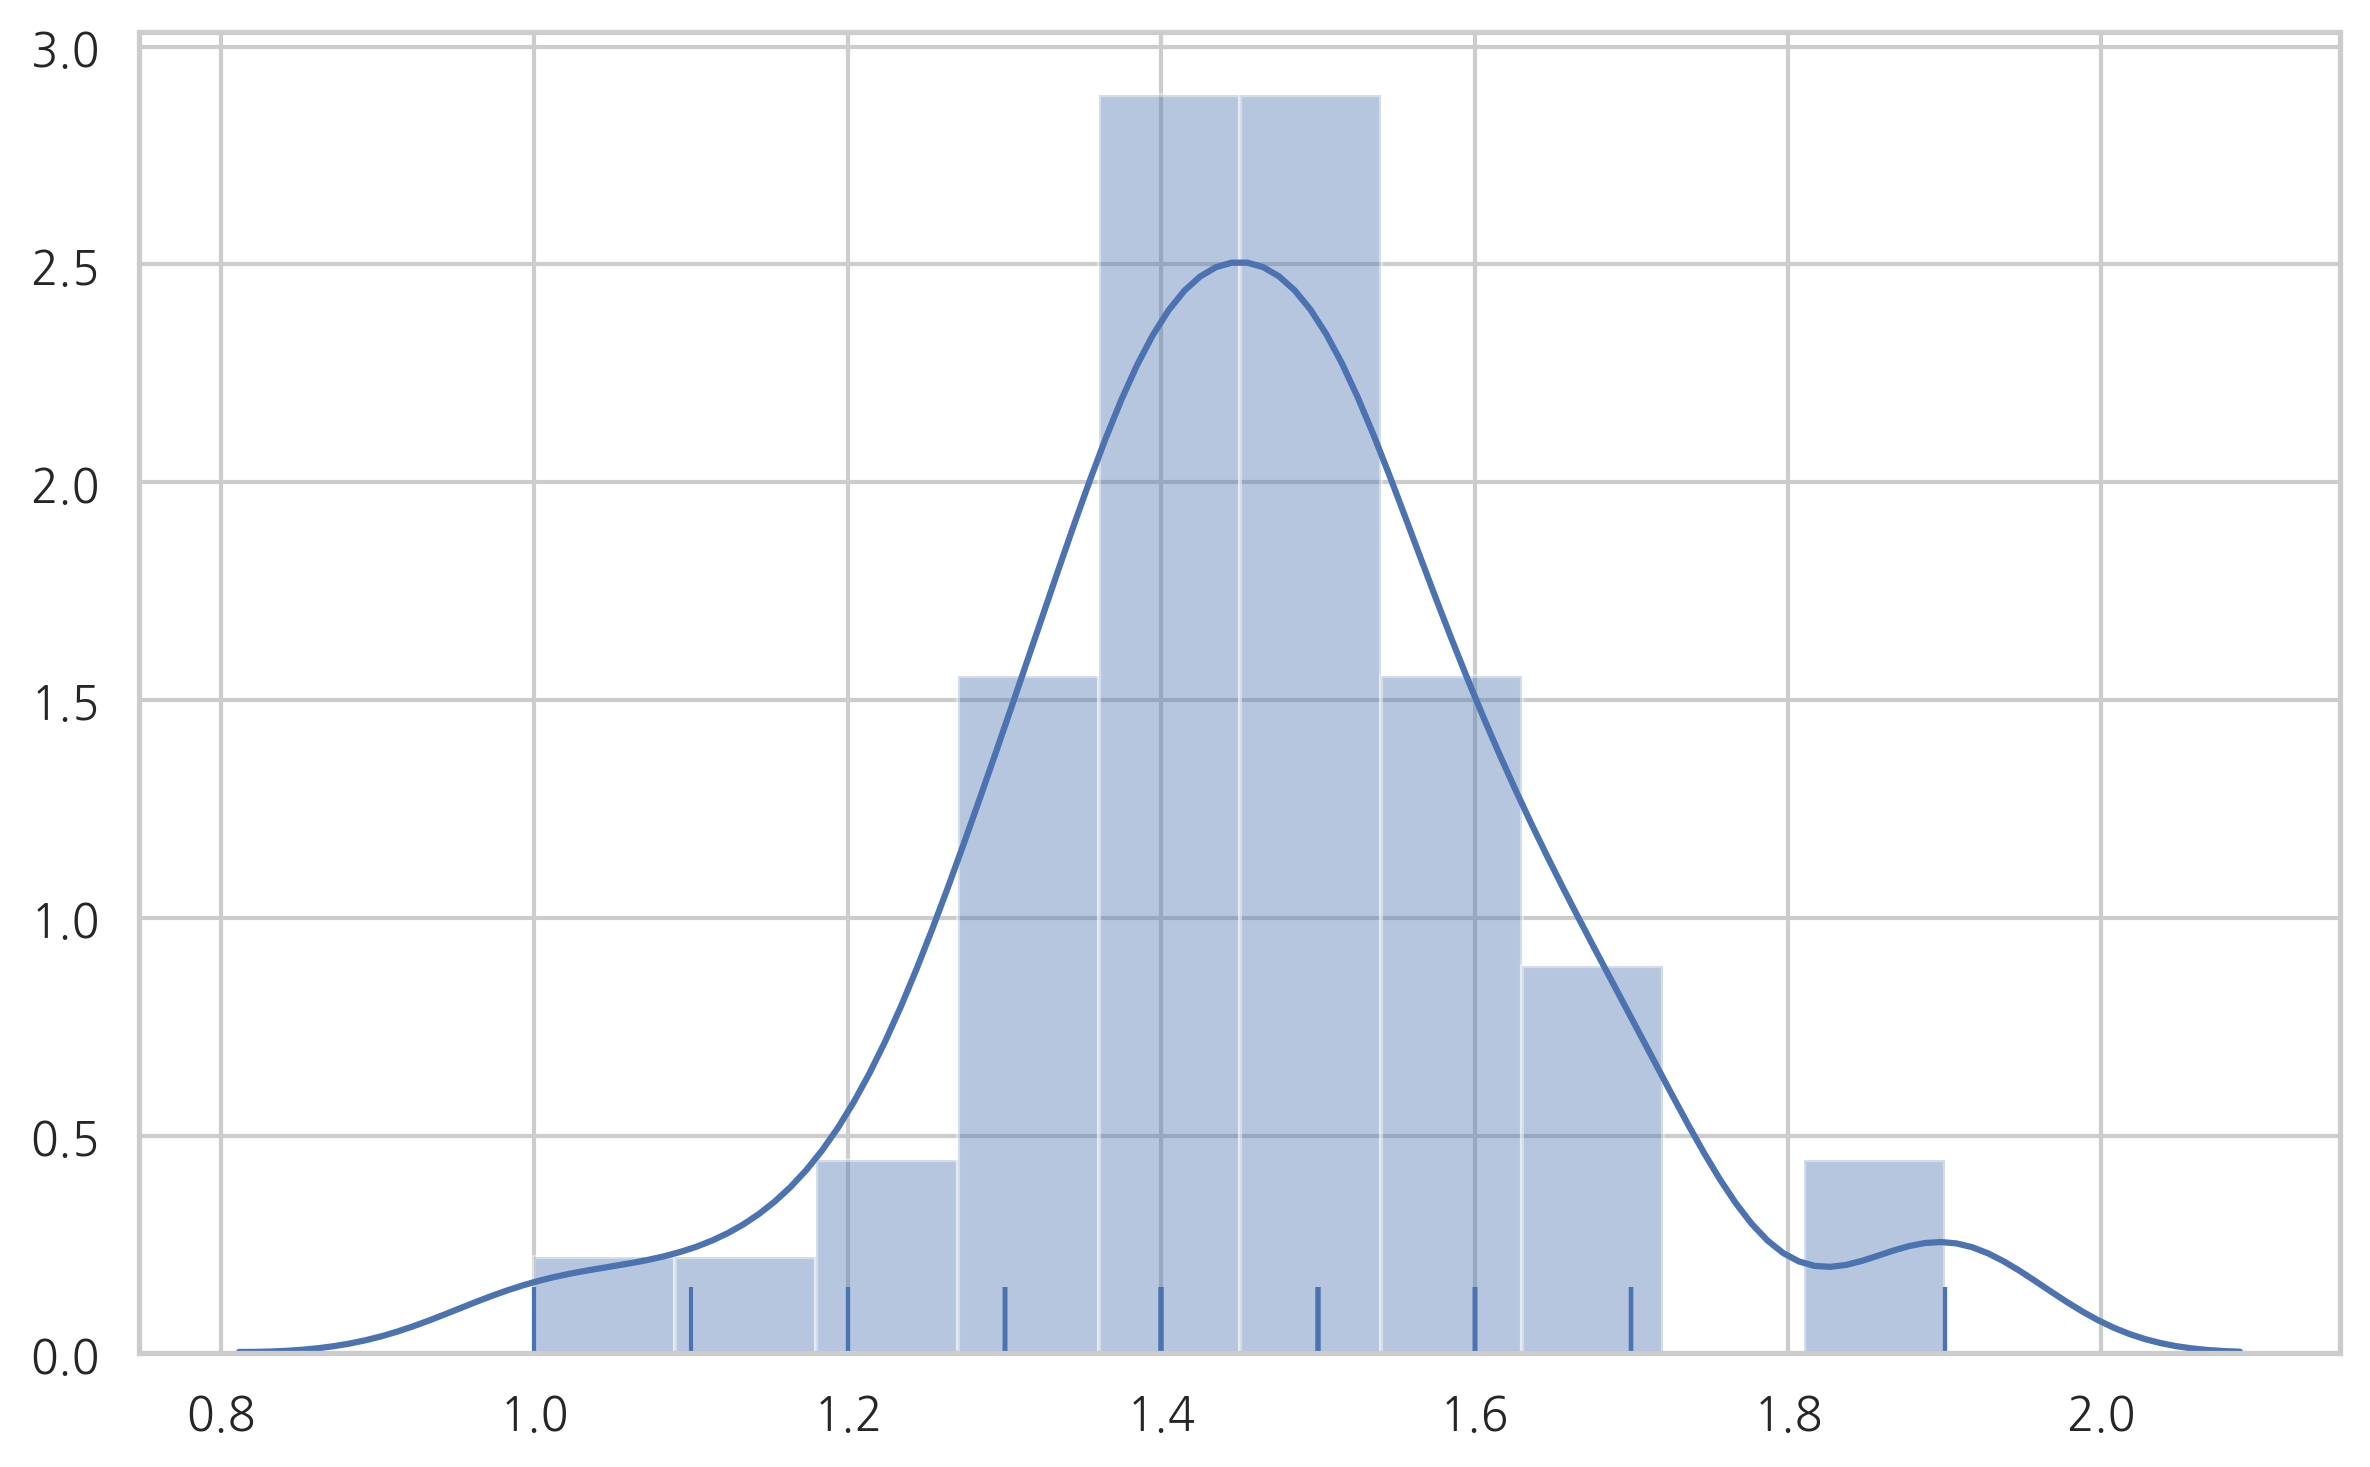

In [5]:
from sklearn.datasets import load_iris

setosa_sepal_length = load_iris().data[:50, 2]
sns.distplot(setosa_sepal_length, rug=True)
plt.tight_layout()
plt.show()

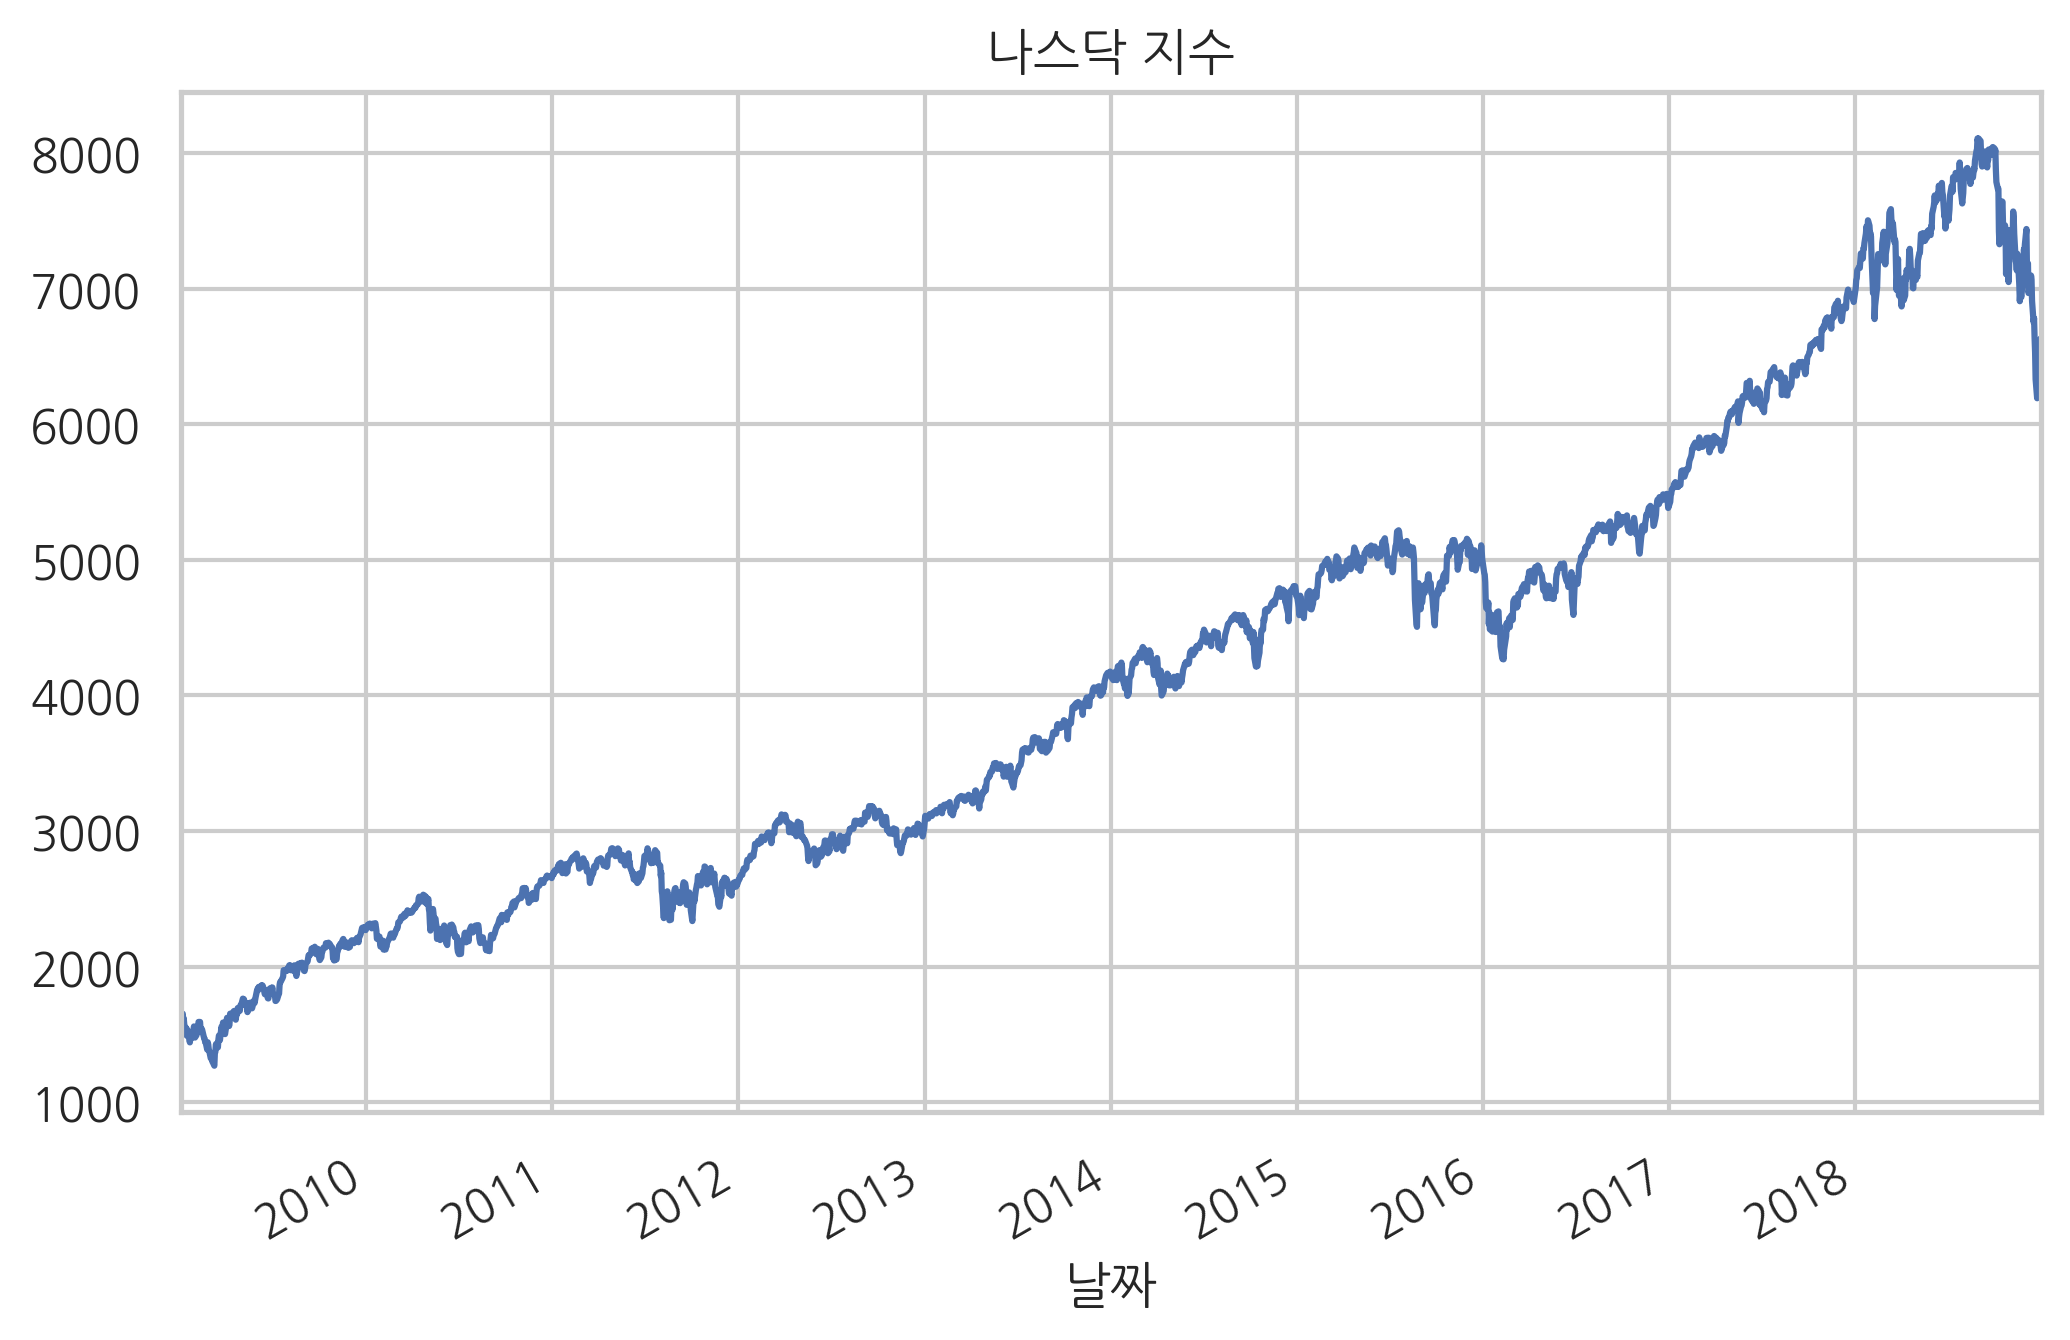

In [6]:
import pandas_datareader.data as web

symbol = "NASDAQCOM"
data = pd.DataFrame()
data[symbol] = web.DataReader(
    symbol, data_source="fred", start="2009-01-01", end="2018-12-31")[symbol]
data = data.dropna()
data.plot(legend=False)
plt.xlabel("날짜")
plt.title("나스닥 지수")
plt.show()

In [7]:
daily_returns = data.pct_change().dropna()
mean = daily_returns.mean().values[0]
std = daily_returns.std().values[0]
print("평균 일간수익률: {:3.2f}%".format(mean * 100))
print("평균 일간변동성: {:3.2f}%".format(std * 100))

평균 일간수익률: 0.06%
평균 일간변동성: 1.17%


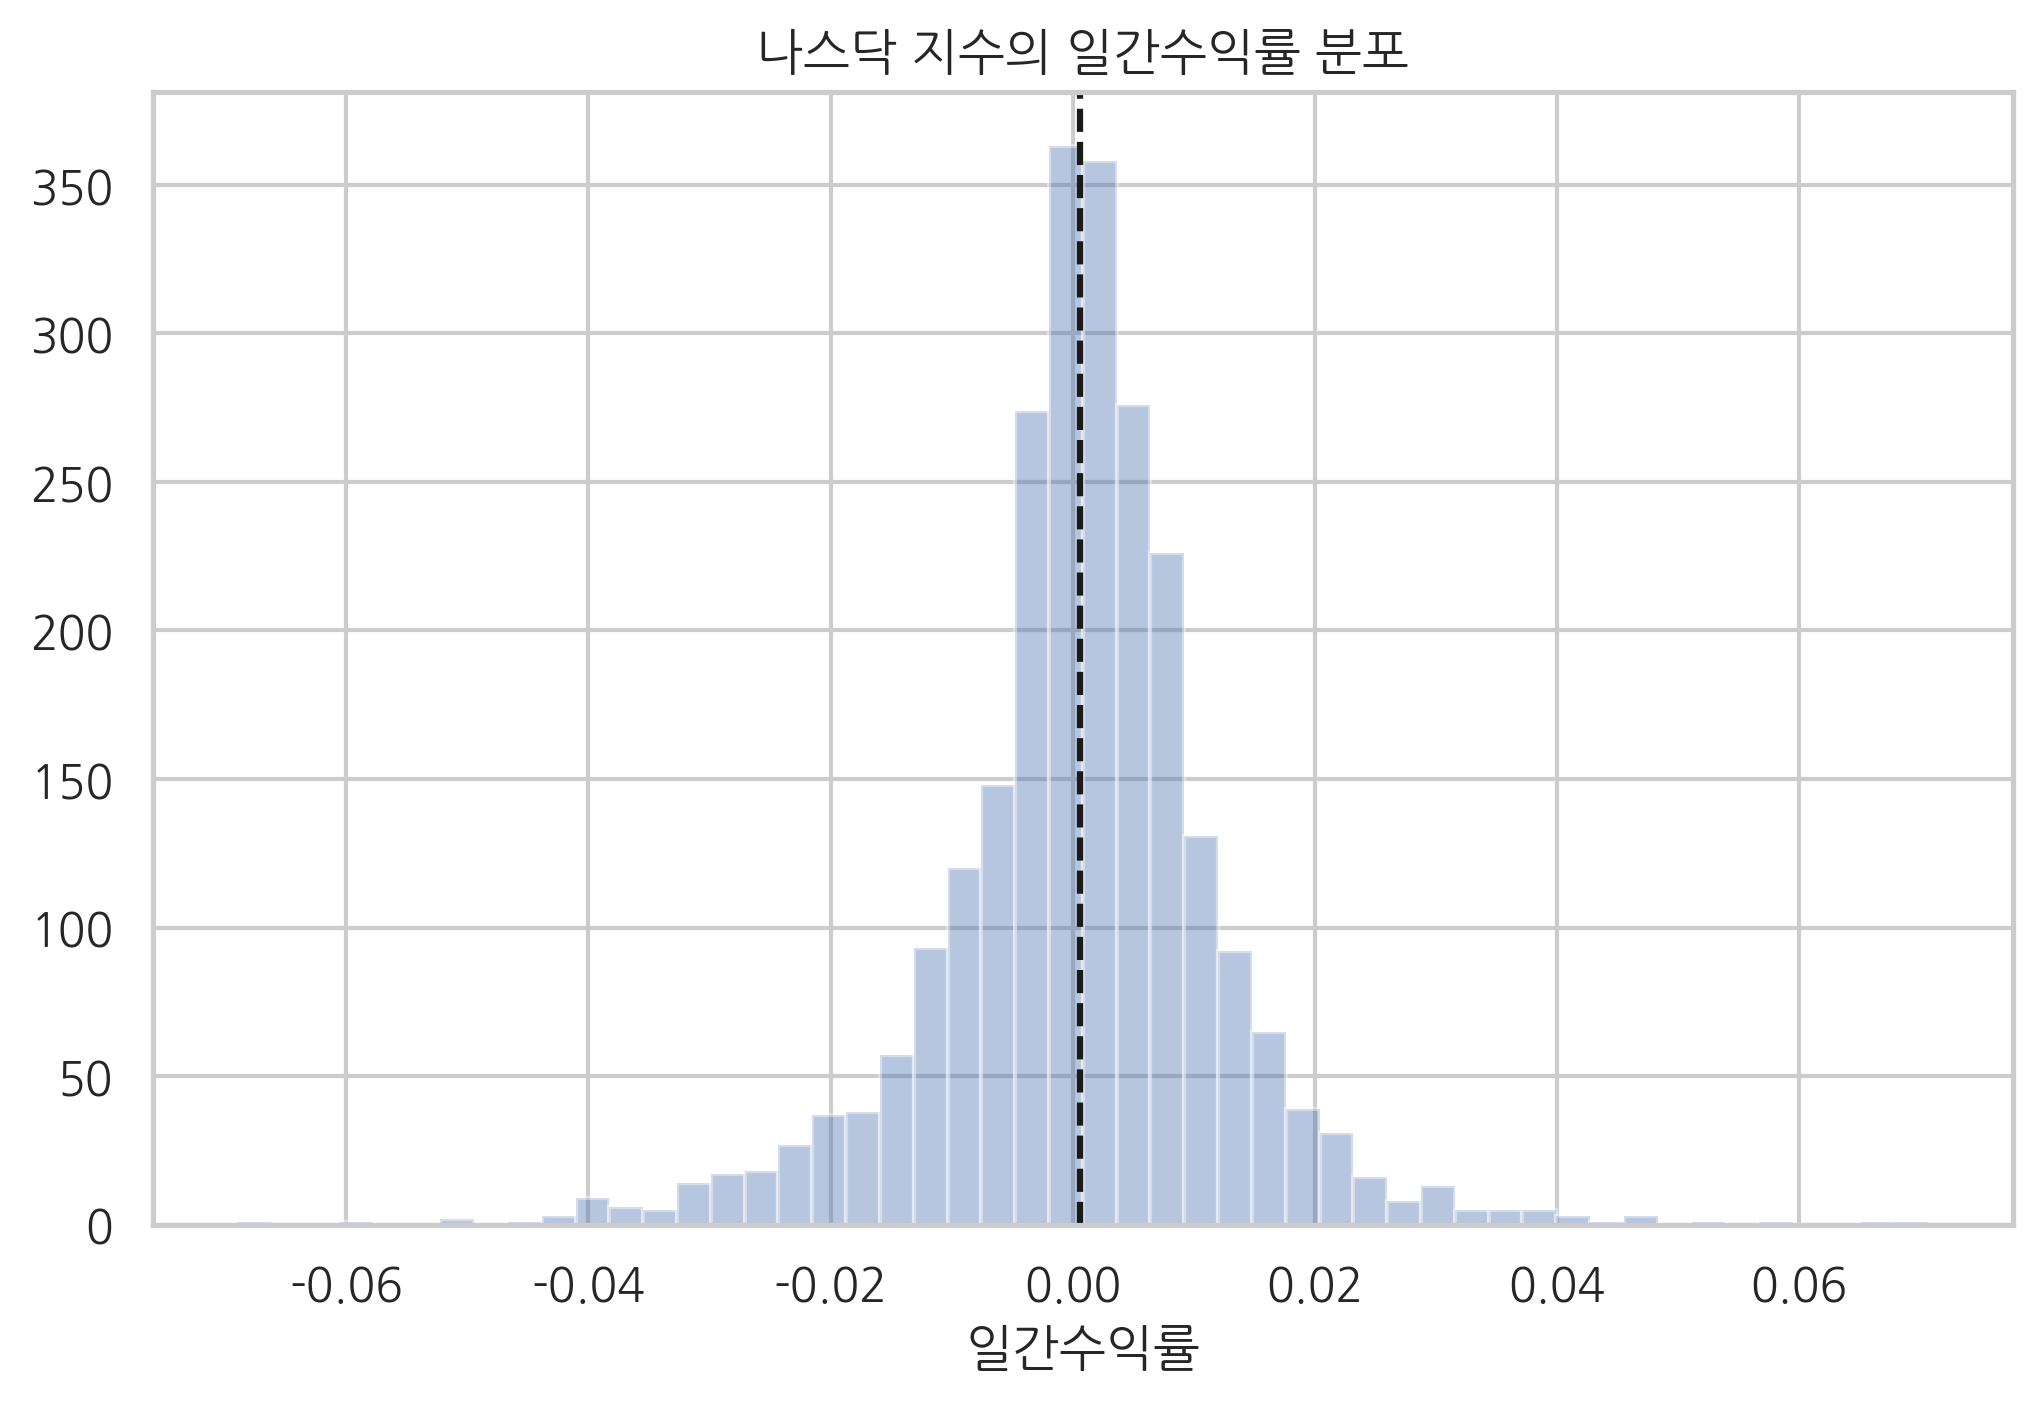

In [8]:
sns.distplot(daily_returns, kde=False)
ymin, ymax = plt.ylim()
plt.vlines(x=mean, ymin=0, ymax=ymax, ls="--")
plt.ylim(0, ymax)
plt.title("나스닥 지수의 일간수익률 분포")
plt.xlabel("일간수익률")
plt.show()

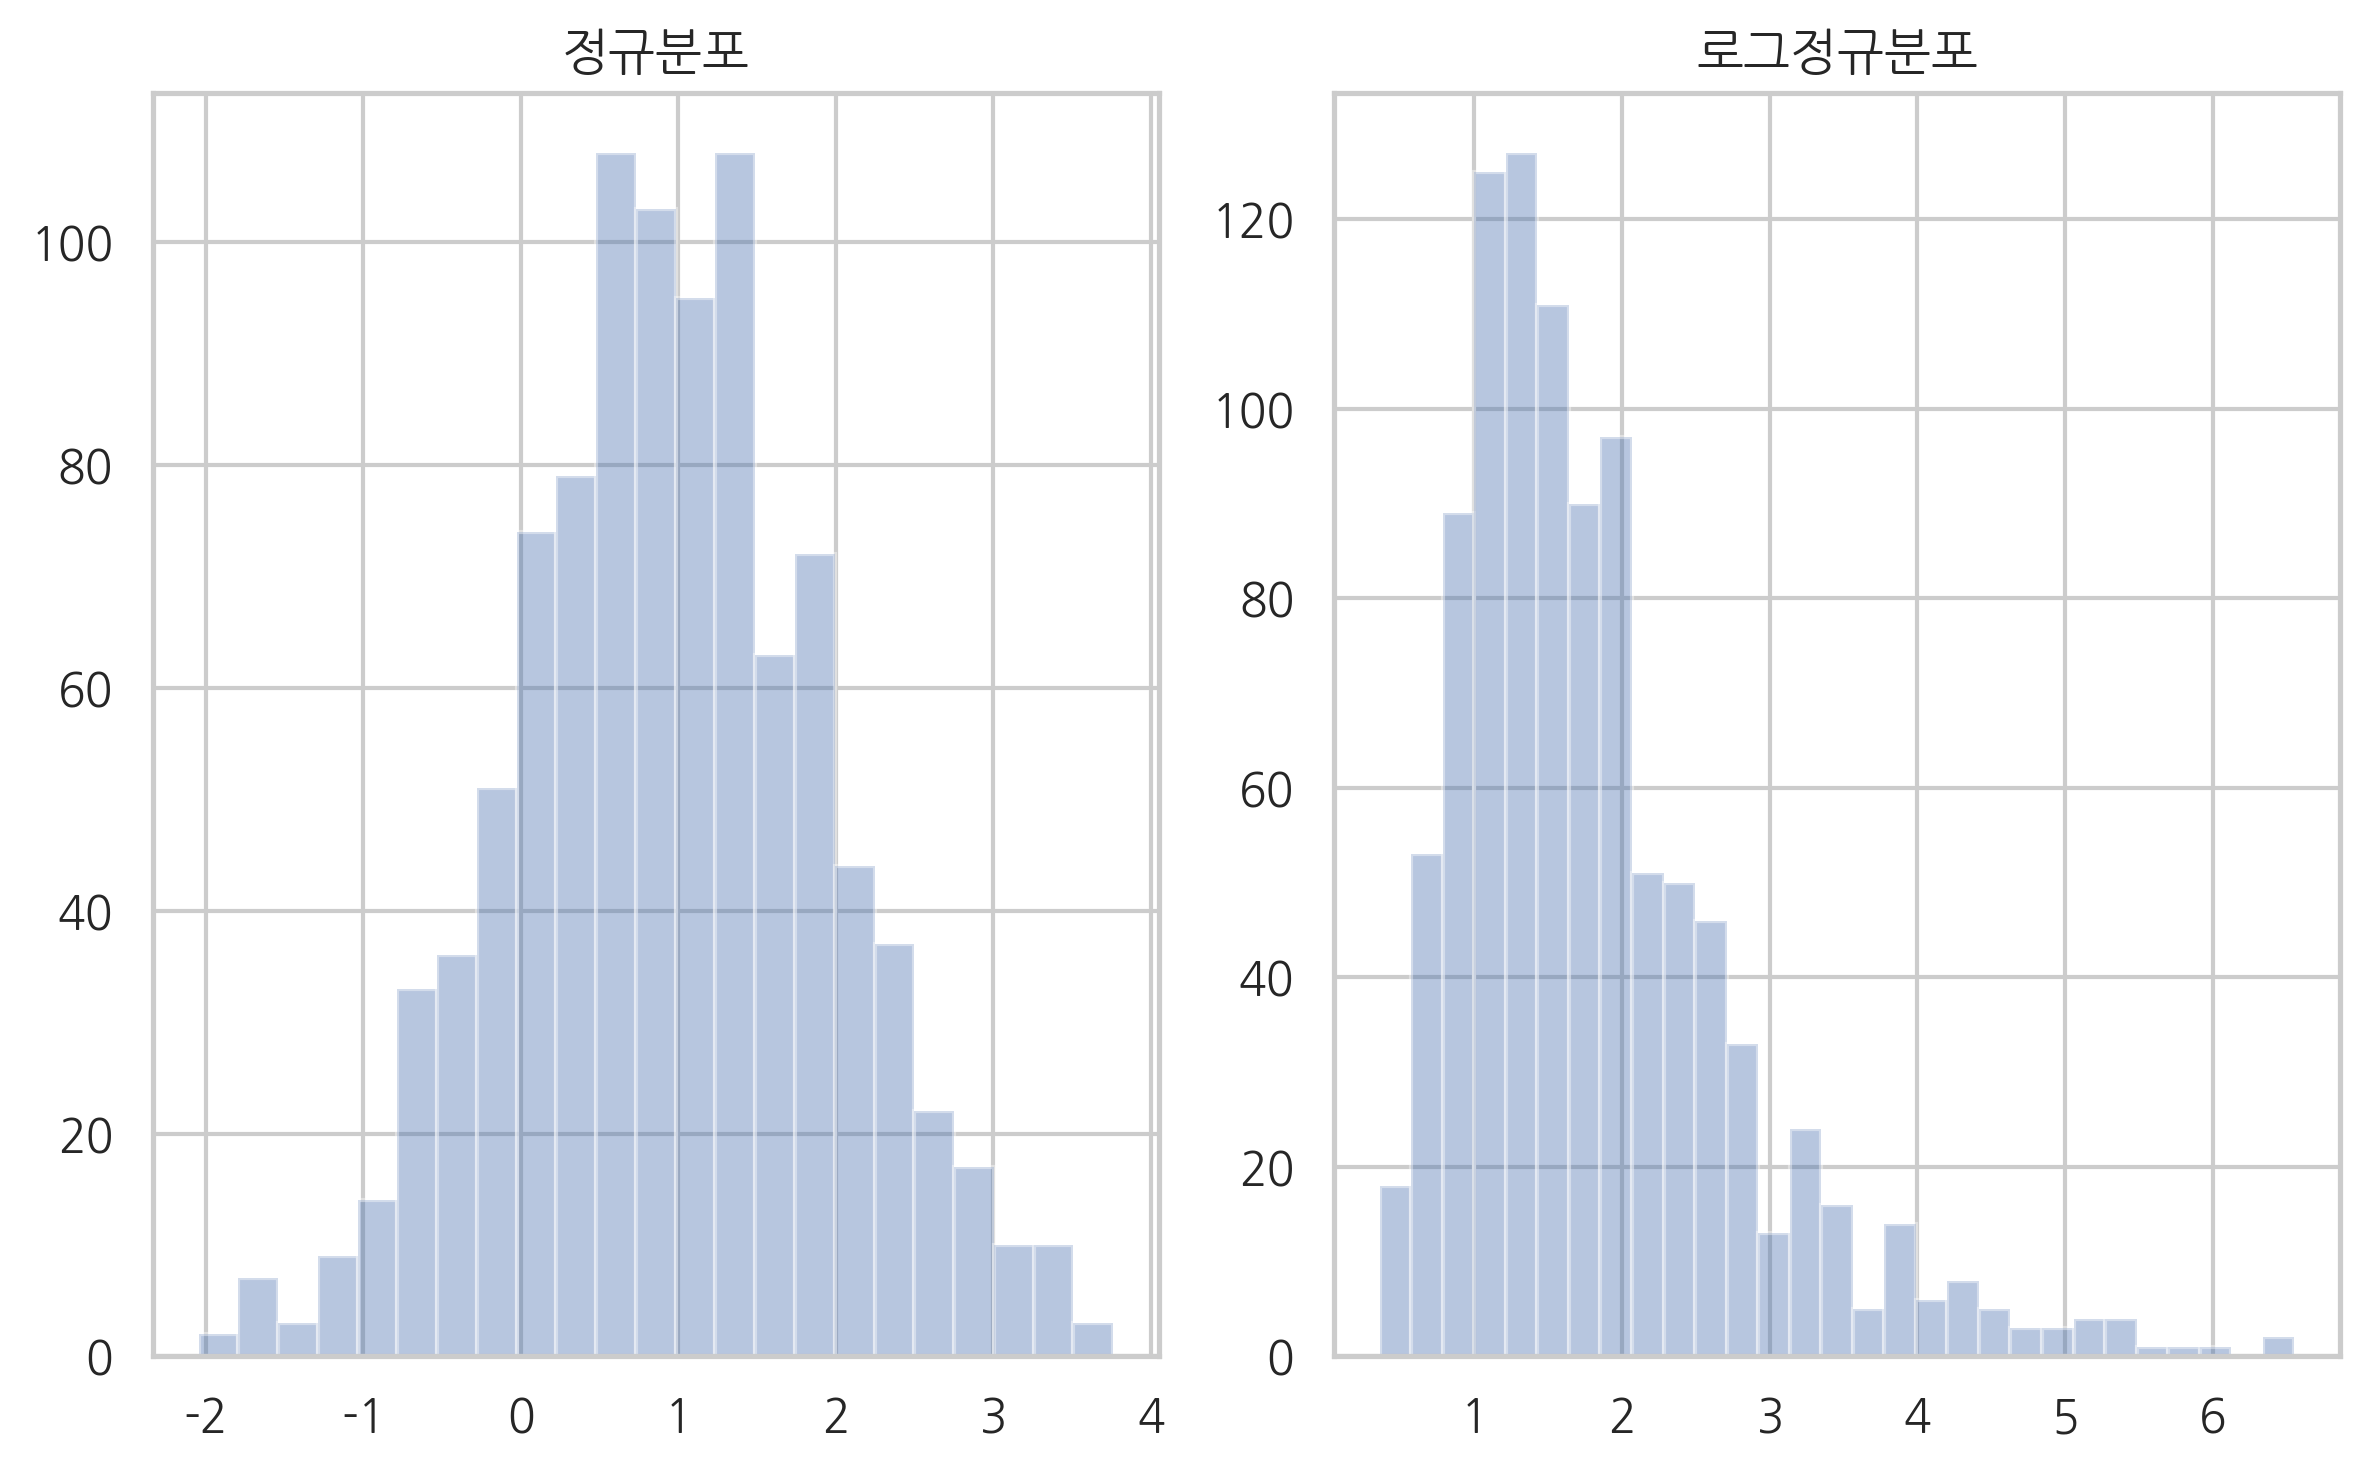

In [9]:
np.random.seed(0)
mu = 1
rv = sp.stats.norm(loc=mu)
x1 = rv.rvs(1000)
s = 0.5
x2 = np.exp(s * x1)

fig, ax = plt.subplots(1, 2)
sns.distplot(x1, kde=False, ax=ax[0])
ax[0].set_title("정규분포")
sns.distplot(x2, kde=False, ax=ax[1])
ax[1].set_title("로그정규분포")
plt.tight_layout()
plt.show()

In [10]:
x_sorted = np.sort(x)
x_sorted

array([-0.97727788, -0.85409574, -0.20515826, -0.15135721, -0.10321885,
        0.12167502,  0.14404357,  0.3130677 ,  0.33367433,  0.40015721,
        0.4105985 ,  0.44386323,  0.76103773,  0.95008842,  0.97873798,
        1.45427351,  1.49407907,  1.76405235,  1.86755799,  2.2408932 ])

In [11]:
from scipy.stats.morestats import _calc_uniform_order_statistic_medians

position = _calc_uniform_order_statistic_medians(len(x))
position

array([0.03406367, 0.08261724, 0.13172109, 0.18082494, 0.2299288 ,
       0.27903265, 0.32813651, 0.37724036, 0.42634422, 0.47544807,
       0.52455193, 0.57365578, 0.62275964, 0.67186349, 0.72096735,
       0.7700712 , 0.81917506, 0.86827891, 0.91738276, 0.96593633])

In [12]:
qf = rv.ppf(position)
qf

array([-0.8241636 , -0.38768012, -0.11829229,  0.08777425,  0.26091865,
        0.4142824 ,  0.55493533,  0.68726332,  0.81431072,  0.93841854,
        1.06158146,  1.18568928,  1.31273668,  1.44506467,  1.5857176 ,
        1.73908135,  1.91222575,  2.11829229,  2.38768012,  2.8241636 ])

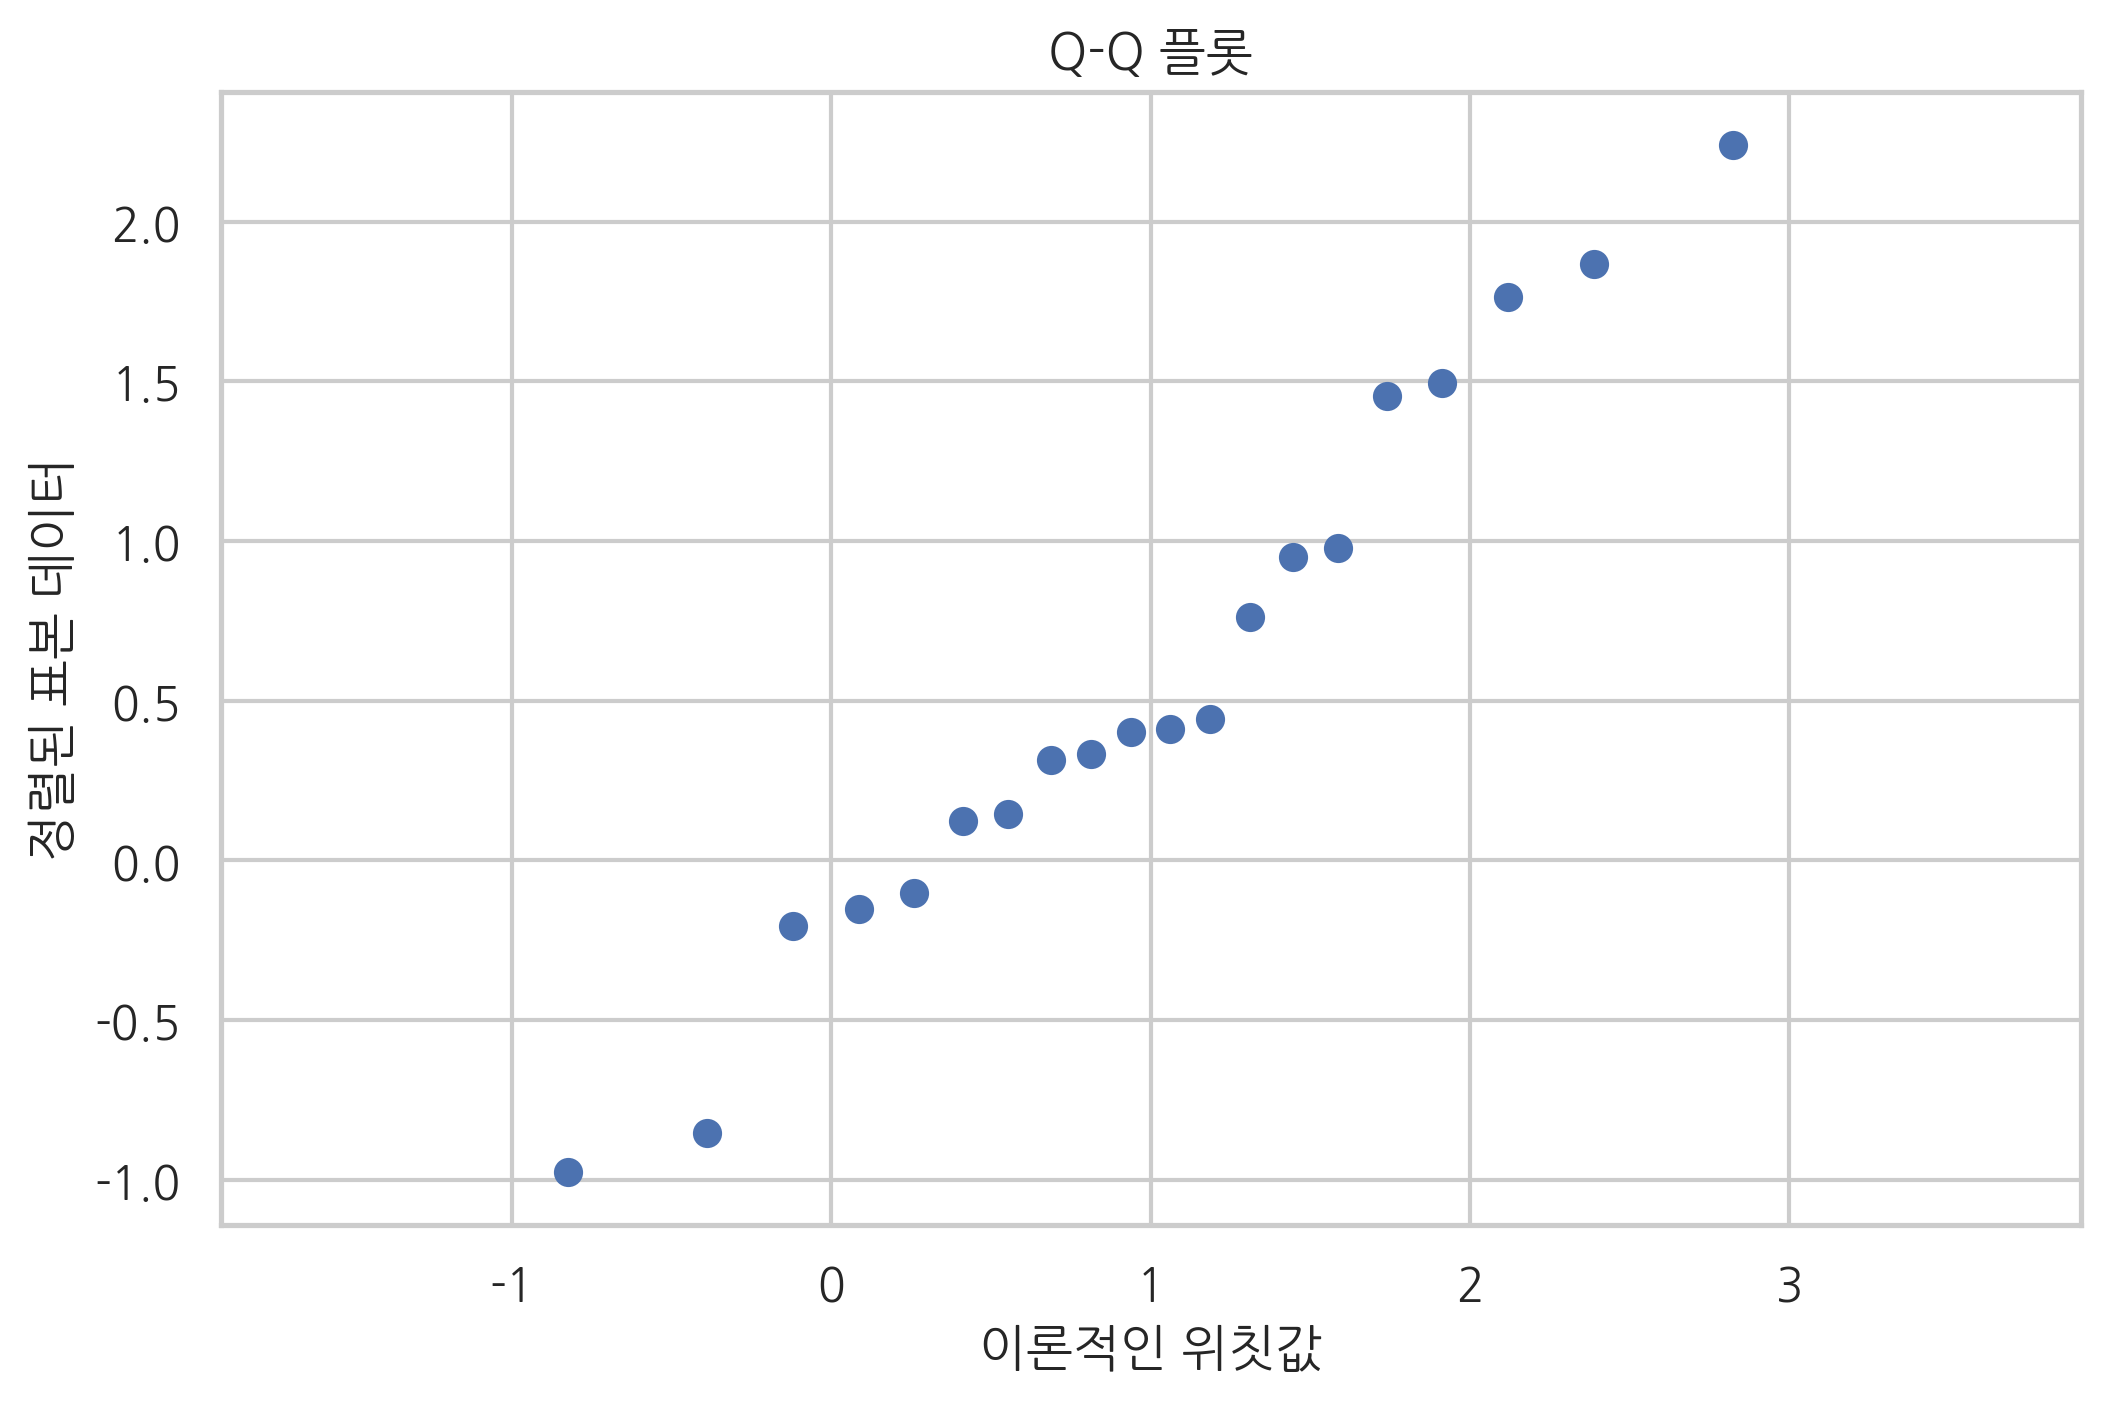

In [13]:
plt.scatter(qf, x_sorted)
plt.title("Q-Q 플롯")
plt.xlabel("이론적인 위칫값")
plt.ylabel("정렬된 표본 데이터")
plt.axis("equal")
plt.show()

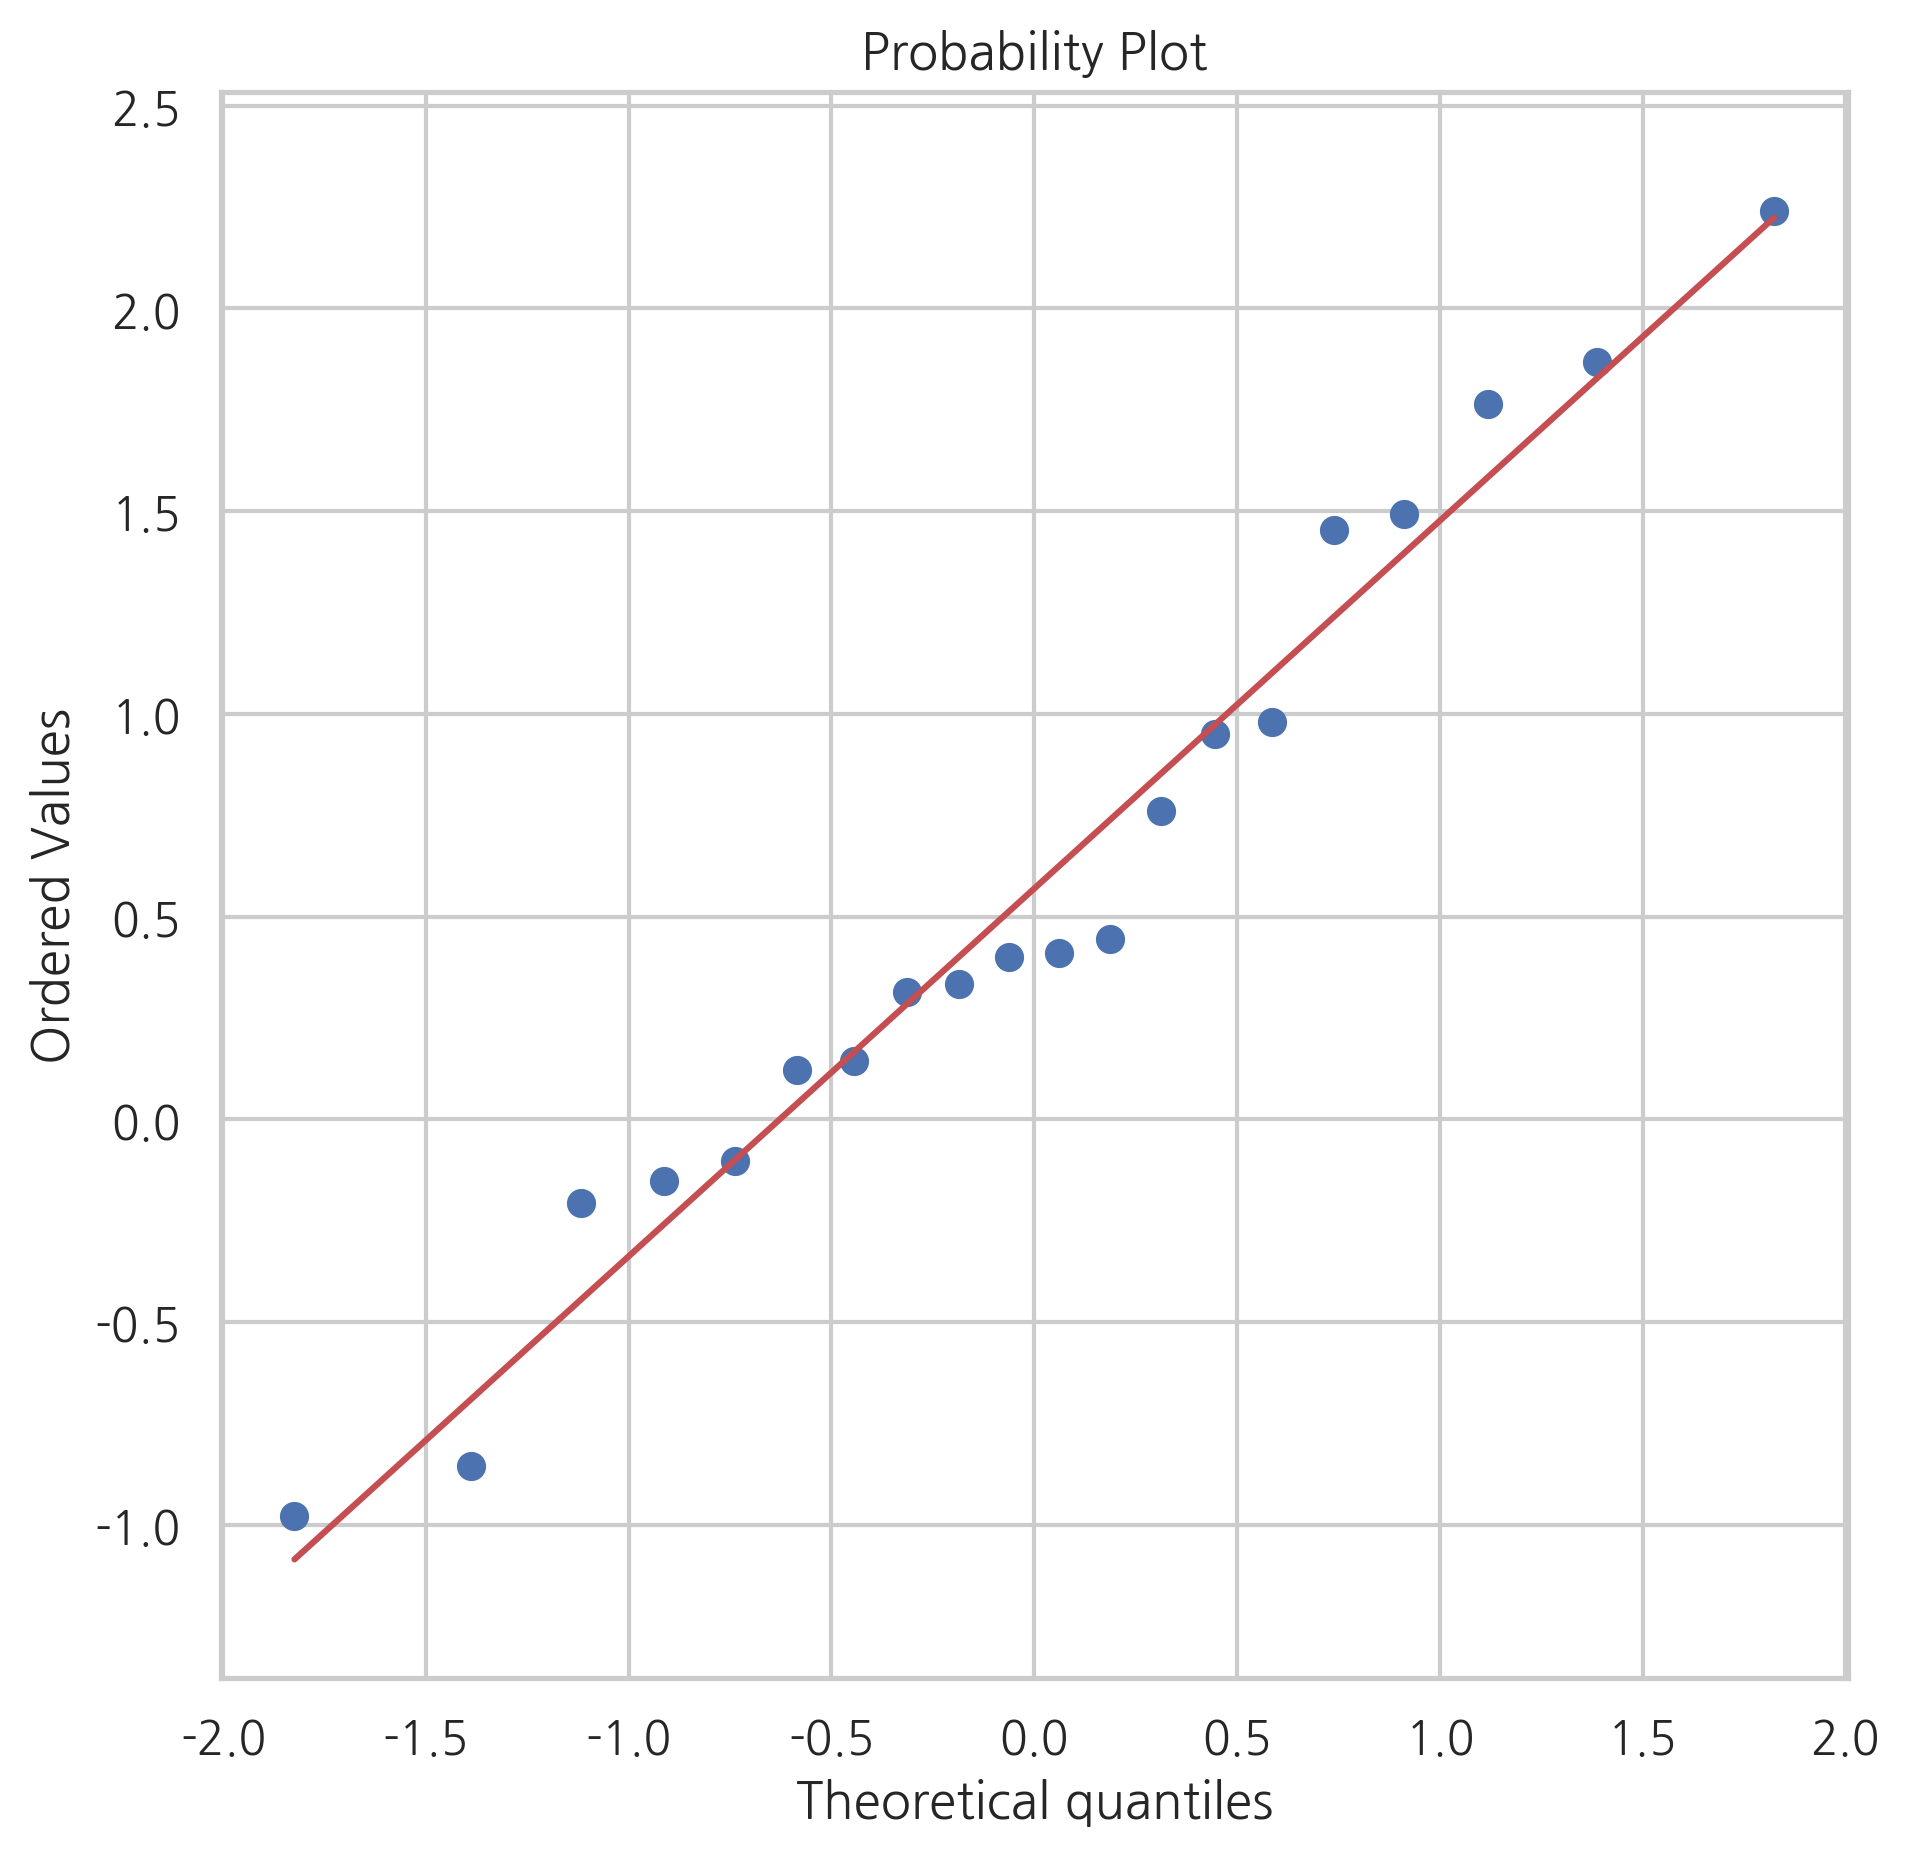

In [14]:
np.random.seed(0)
plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.axis("equal")
plt.show()

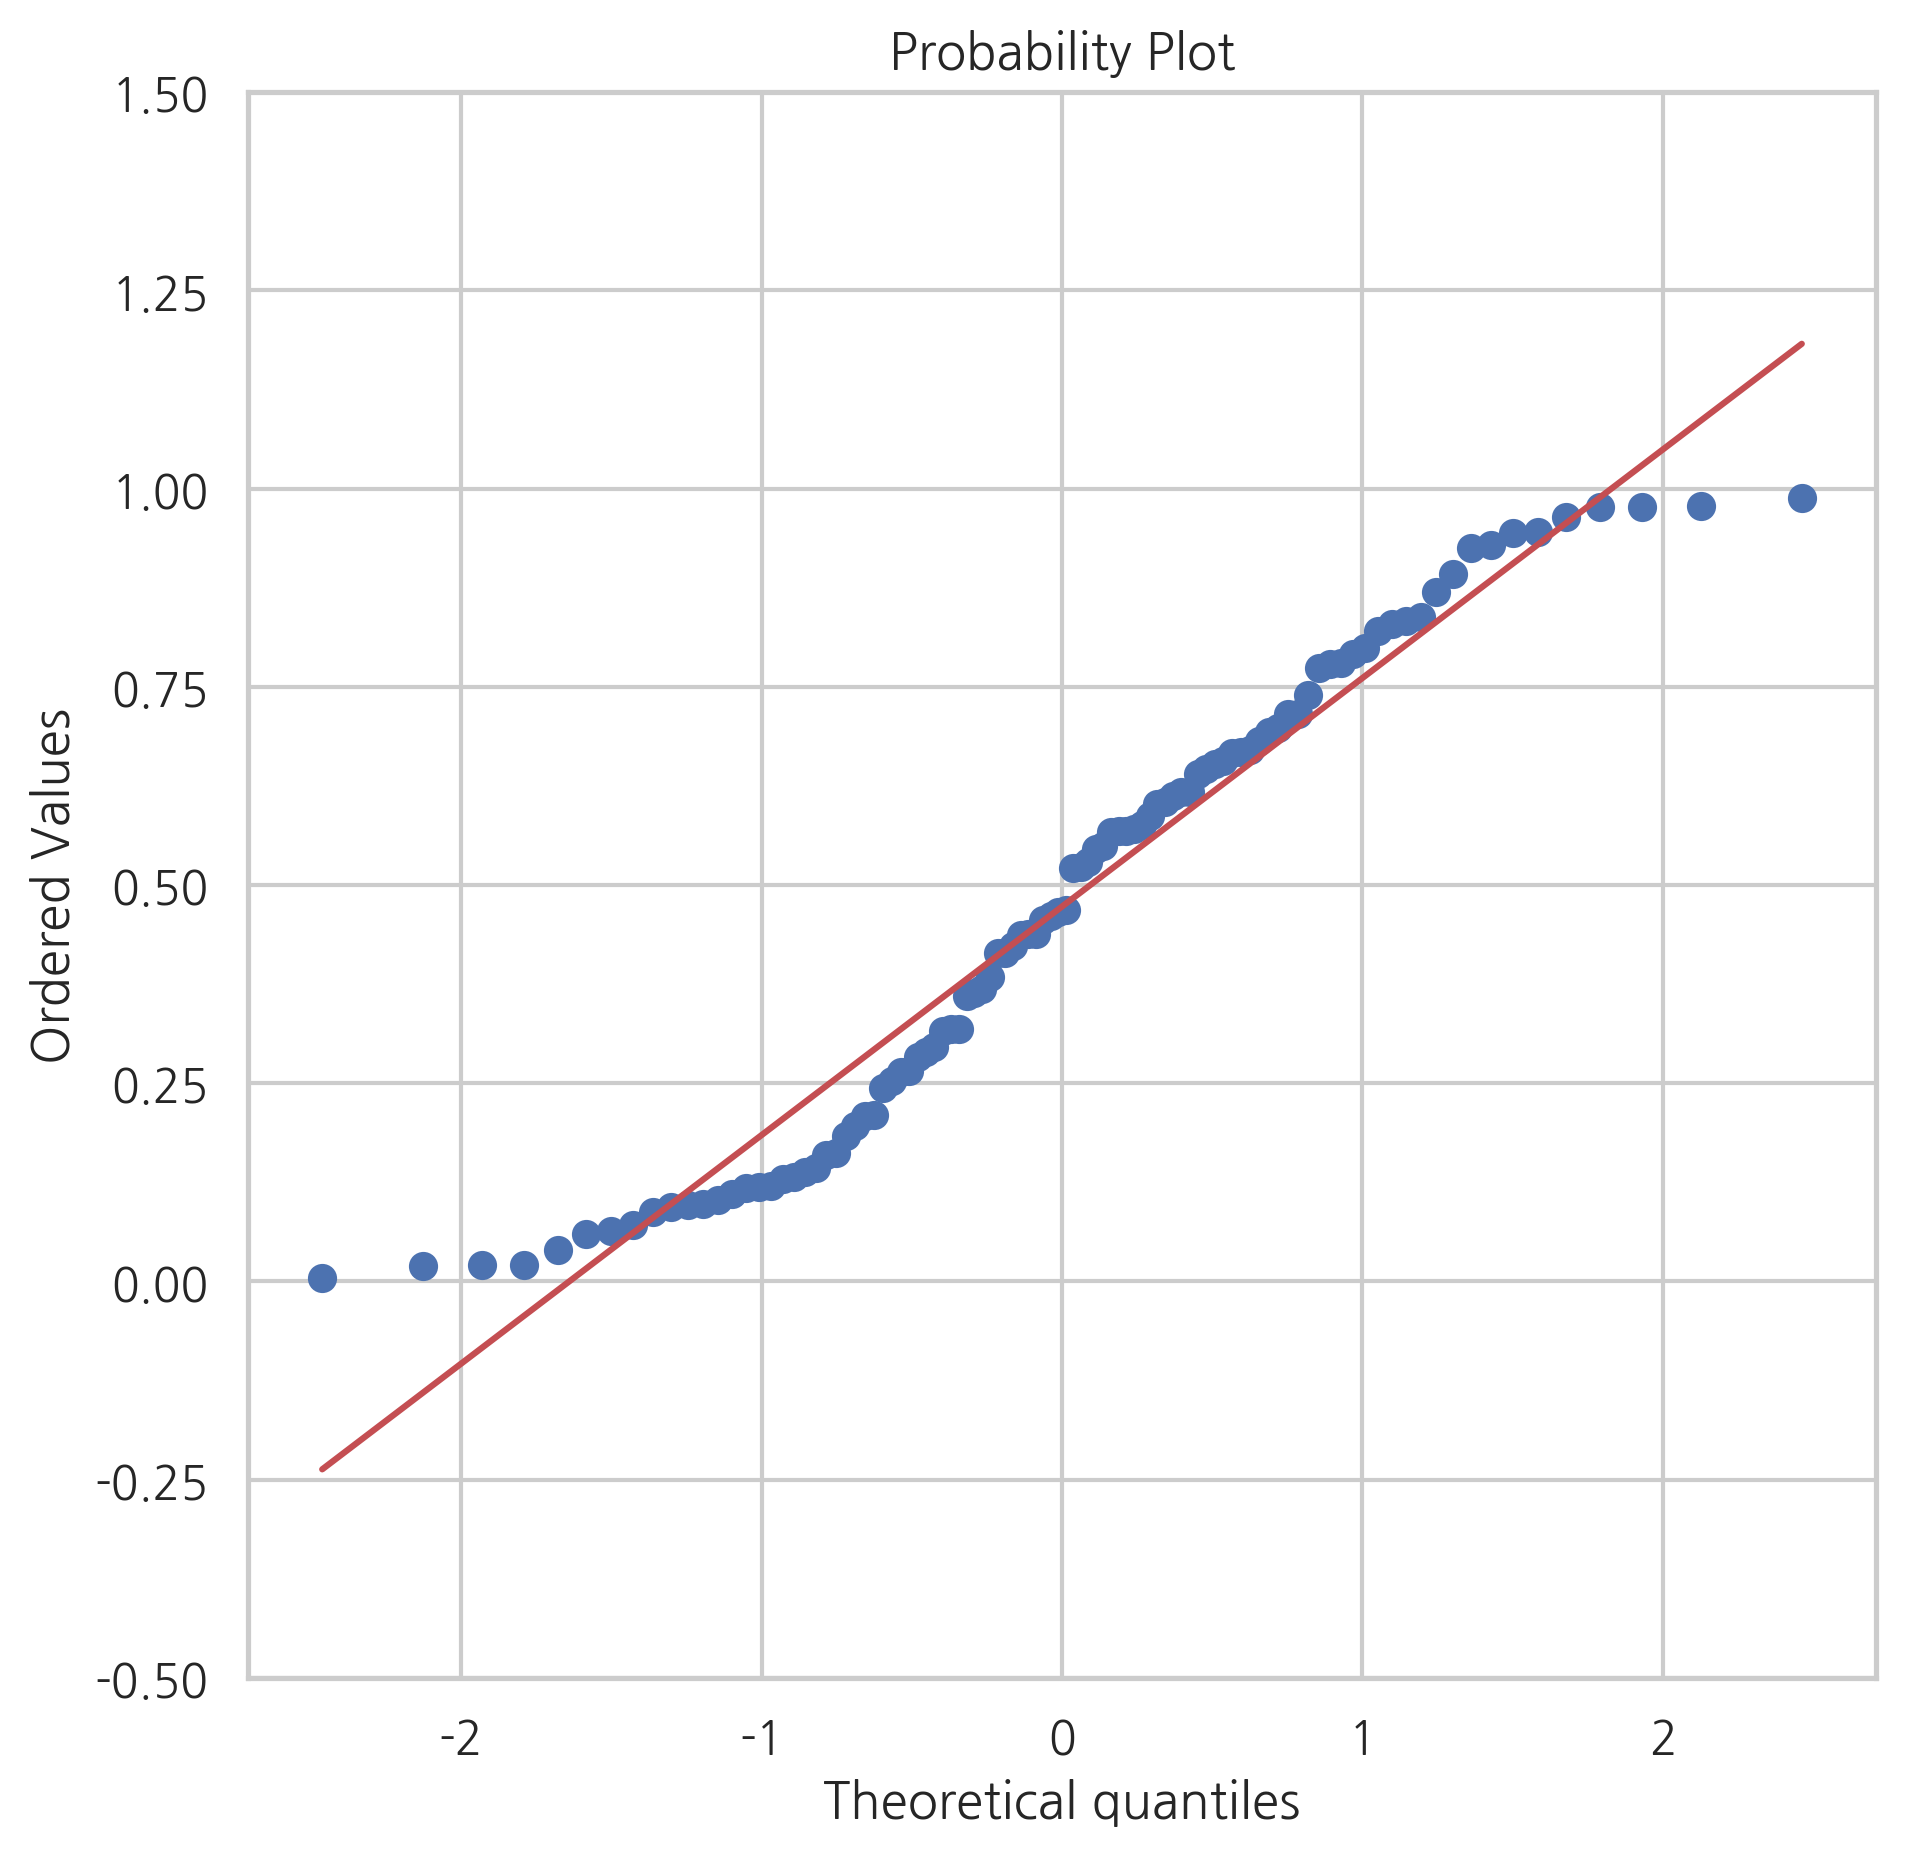

In [15]:
np.random.seed(0)
x = np.random.rand(100)
plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.ylim(-0.5, 1.5)
plt.show()

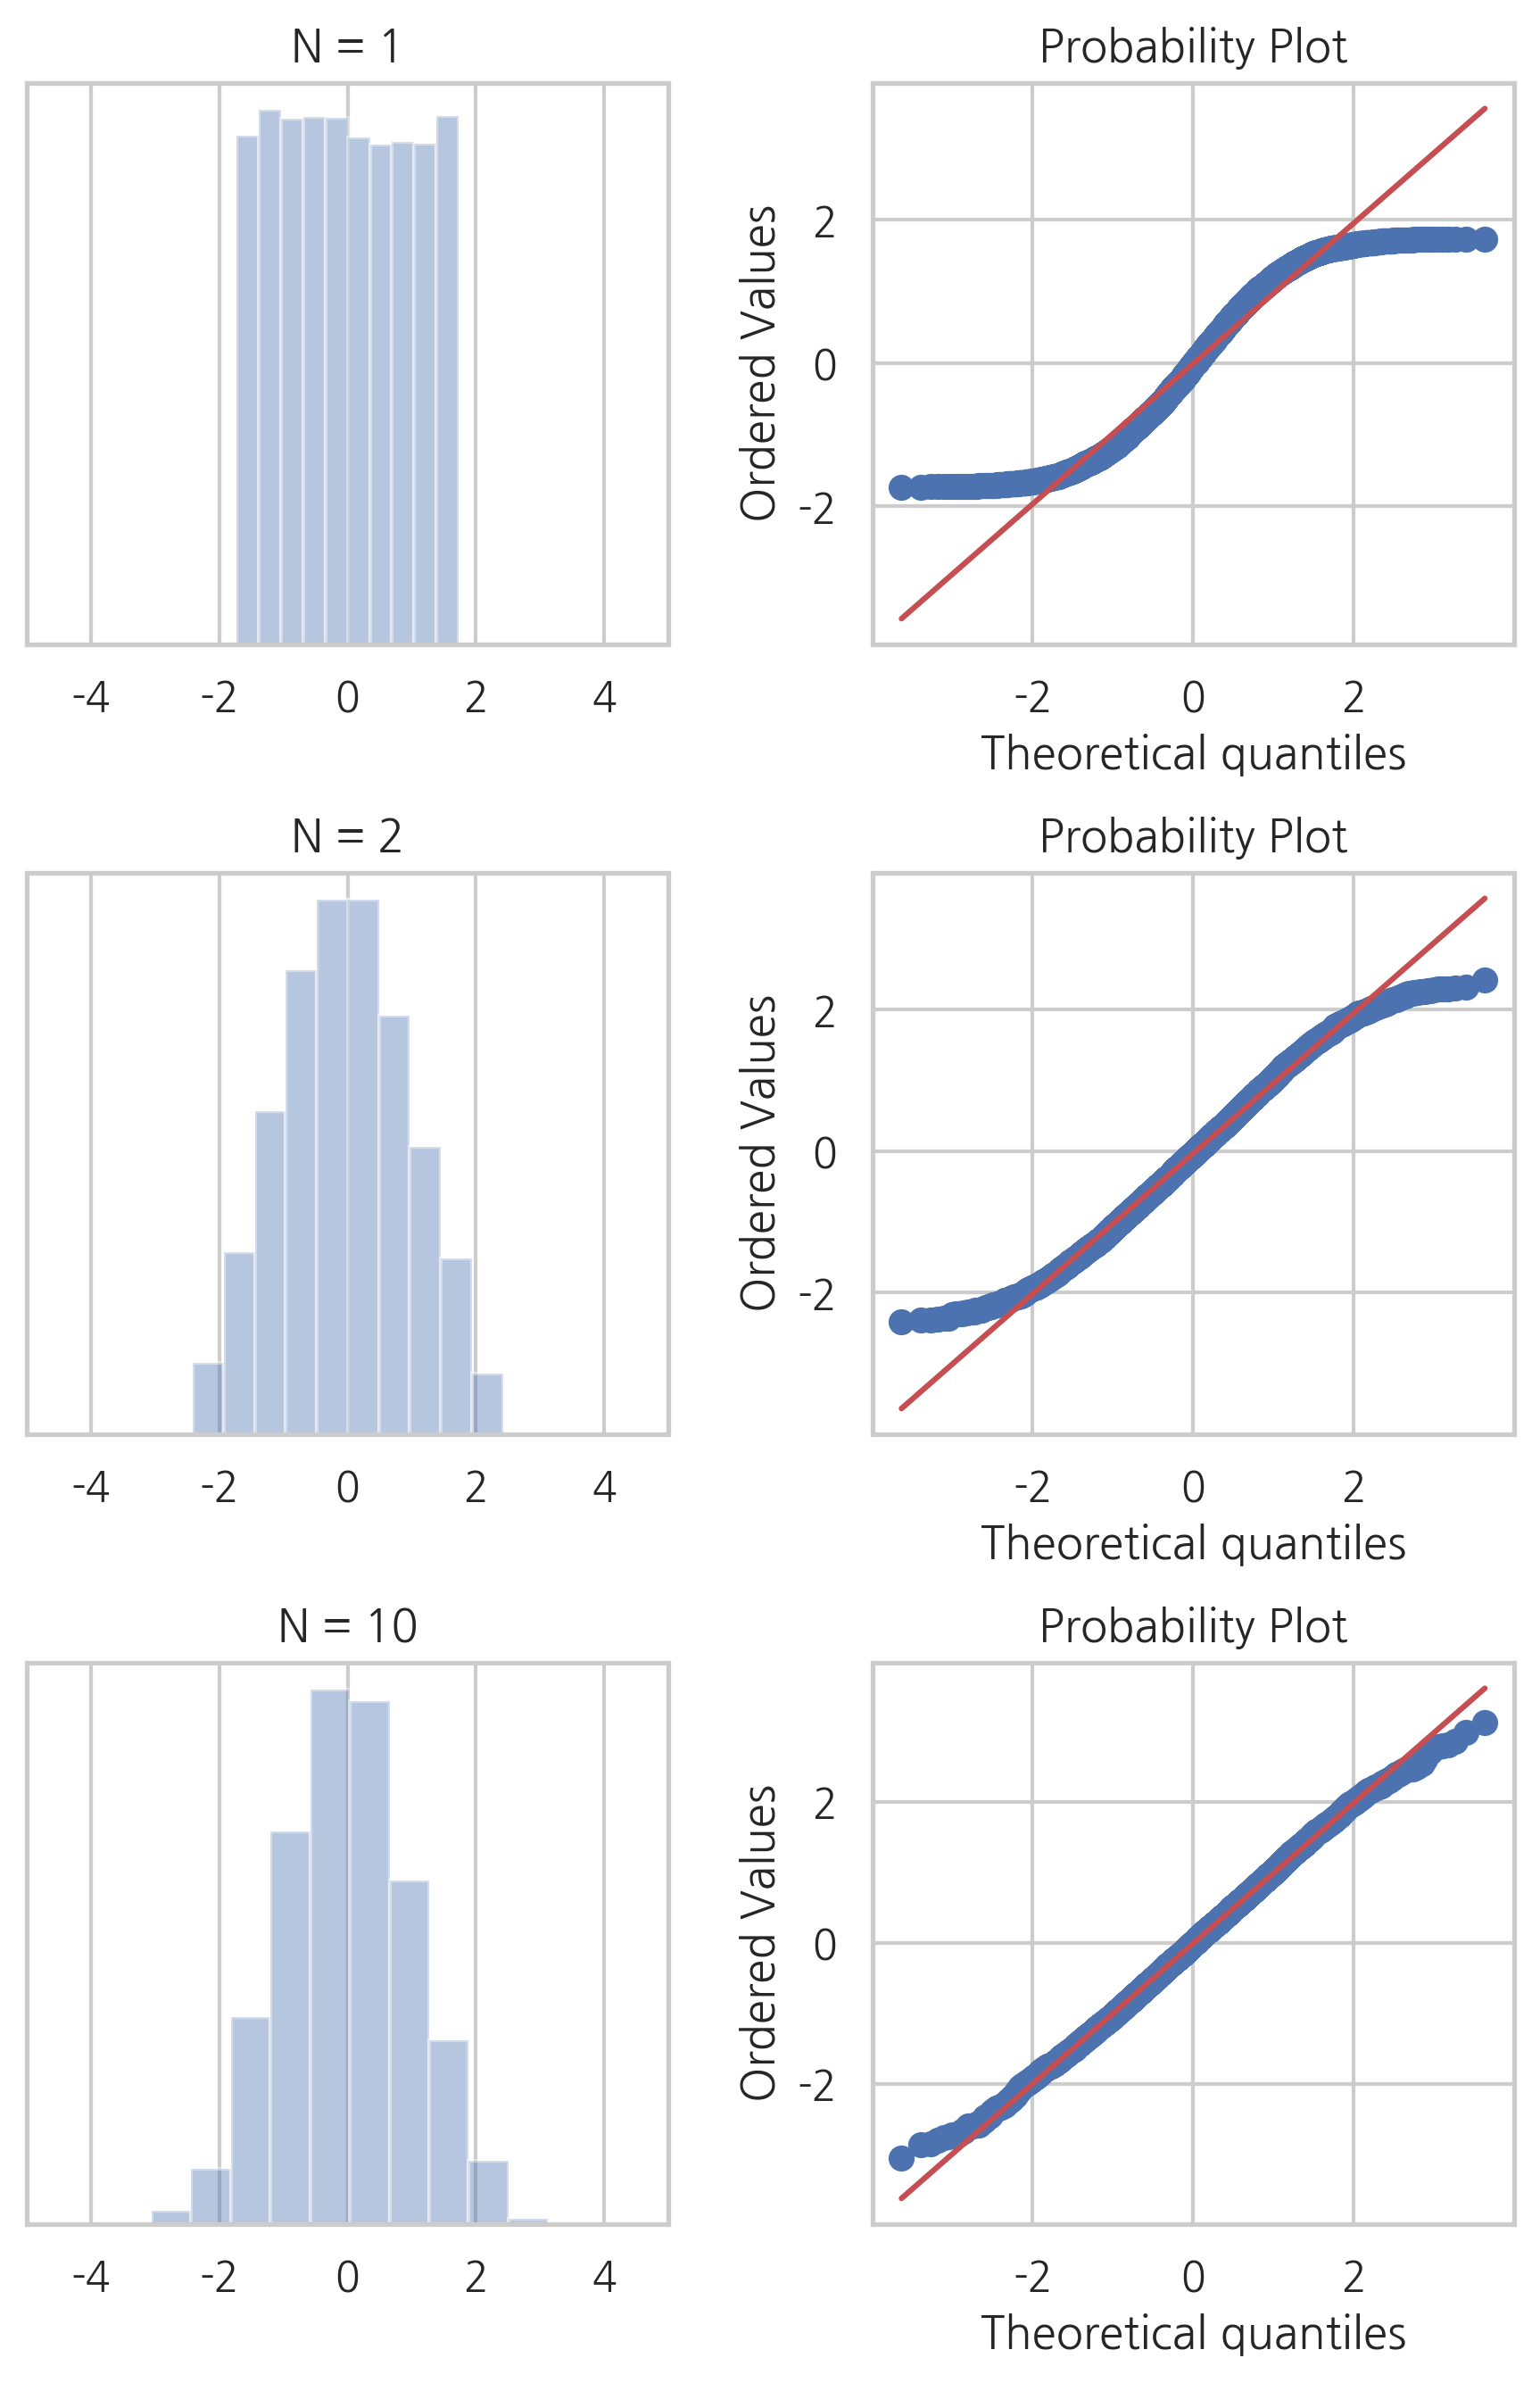

In [16]:
np.random.seed(0)
xx = np.linspace(-2, 2, 100)

plt.figure(figsize=(6, 9))

for i, N in enumerate([1, 2, 10]):
    X = np.random.rand(5000, N)
    Xbar = (X.mean(axis=1) - 0.5) * np.sqrt(12 * N)
    ax = plt.subplot(3, 2, 2 * i + 1)
    sns.distplot(Xbar, bins=10, kde=False, norm_hist=True)
    plt.xlim(-5, 5)
    plt.yticks([])
    ax.set_title("N = {0}".format(N))
    plt.subplot(3, 2, 2 * i + 2)
    sp.stats.probplot(Xbar, plot=plt)

plt.tight_layout()
plt.show()